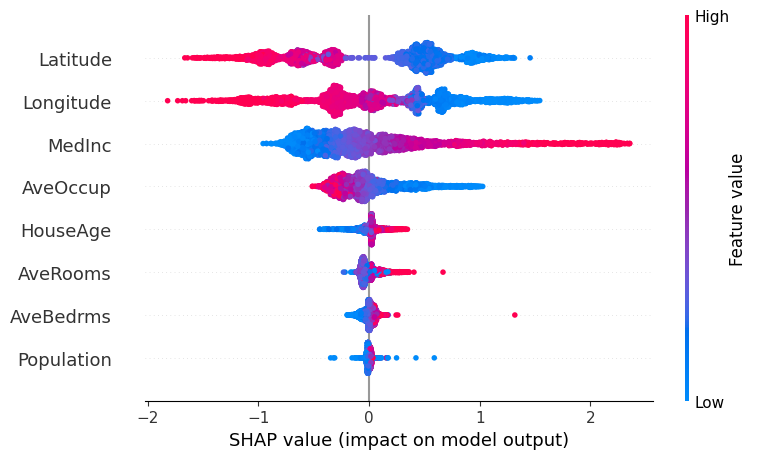

In [ ]:
import shap
import xgboost as xgb
import matplotlib
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1)
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values
shap_values = explainer(X_test)

# Plot summary
shap.summary_plot(shap_values, X_test)

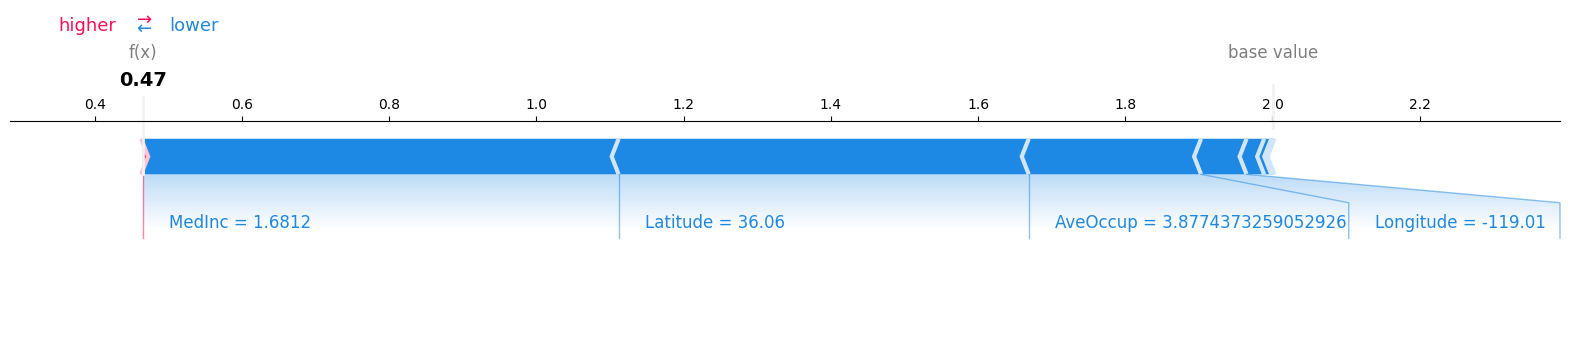

In [2]:
# Force plot for individual prediction
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values.values[0],       # Raw SHAP values for first sample
    features=X_test.iloc[0],                 # Raw feature values for that sample
    feature_names=X_test.columns,
    matplotlib=matplotlib
)

/tmp/ipykernel_79175/868643119.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


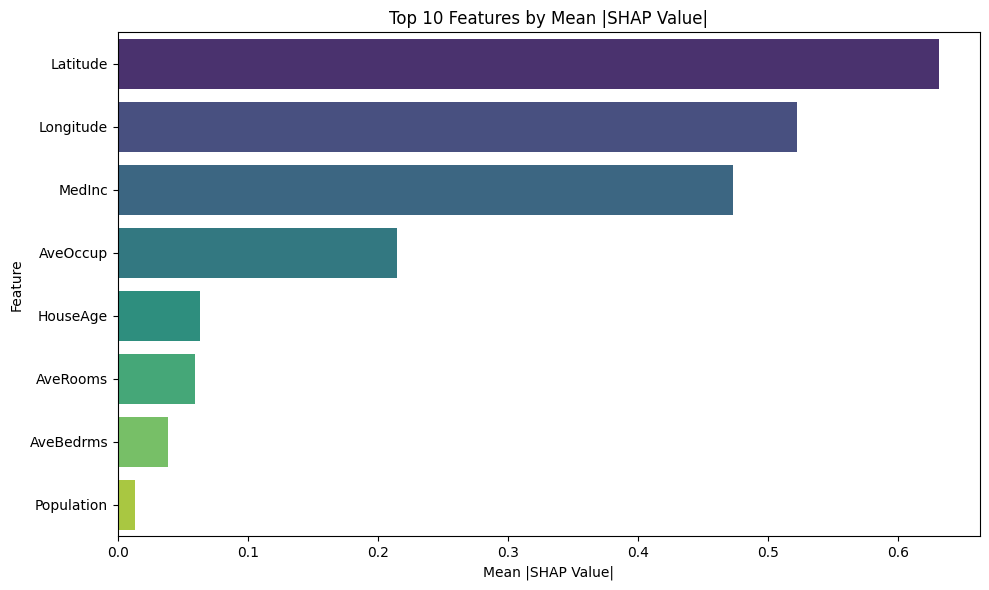

In [ ]:


feature_importance = np.abs(shap_values.values).mean(axis=0)
feature_names = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean |SHAP Value|': feature_importance
}).sort_values(by='Mean |SHAP Value|', ascending=False)

# Plot top 10 features by importance
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Mean |SHAP Value|',
    y='Feature',
    data=importance_df.head(top_n),
    palette='viridis'
)
plt.title(f"Top {top_n} Features by Mean |SHAP Value|")
plt.xlabel("Mean |SHAP Value|")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
